In [24]:
#Program Name: sandpile.ipynb
#Date Created: September 5th, 2022
#Author: Deepesh Verma (dbv293)
#Function: Implementation of the Abelian Sandpile

In [25]:
import numpy as np

In [26]:
class ASP:
    """
     Simulation of the Abelian sandpile. Each lattice site is intiailized with some random value of grains less 
    than max_height. Then a single grain is deposited onto a random lattice site and the system is allowed to 
    evolve following the rules dictating the Bak–Tang–Wiesenfeld model until it becomes stable. The process 
    occurs for n_steps.

    Parameters:
        n: size of the square n by n lattice
        grid: stores the values of the sandpile heights 
        past: stores last step of values of the sandpile heights
    """

    def __init__(self,n,random_state=None):
        """
        Initializes the sandpile and populates it by random int values between 0-3. Also, writes last step 
        values of sandpile heights to past.
        """
        self.n = n
        np.random.seed(random_state)

        #Populates grid with random int values between 0-3.
        self.grid = np.random.choice(4,size=(n,n))

        #Writes last step values of sandpile heights to past.
        self.past = [self.grid.copy()]

    def BTW(self,x,y):
        """
        Implements the update rules of the Bak–Tang–Wiesenfeld model for when we add a single grain to a random
        lattice site. Evolves the heights of the sandpile due to toppling.
        """
        #Adds grain to lattice site.
        self.grid[x,y]+=1      

        #Topple calculation.

        #Pile is below topple height.
        if self.grid[x,y]<4: 
            return None

        #Pile is above topple height.
        else:   
            #Pile topples, so height goes to 0. 
            self.grid[x,y]-=4

            #Update rules for BTW model.
            if x > 0:
                self.BTW(x-1,y)
            if x < self.n-1:
                self.BTW(x+1,y)
            if y > 0:
                self.BTW(x,y-1)
            if y < self.n-1:
                self.BTW(x,y+1)
            return None

    def step(self):
        """
        Evolves the sandpile simulation by a single step. Involves adding a grain to a random lattice site 
        and the corresponding toppling that it causes.
        """
        #Determines a random lattice site for which we add a grain. 
        x, y = np.random.choice(self.n,2)

        #Adds the grain and performs the BTW update for the lattice site. 
        self.BTW(x,y)

    @staticmethod
    def diff(agrid,bgrid):
        """
        Counts the number of different lattice sites between two grids. Used when comparing grid and past arrays.
        """
        return np.sum(agrid!=bgrid)

    def runsim(self,n_steps):
        """
        Runs the Abelian sandpile simulation for n_steps.
        """
        for i in range(n_steps):
            self.step()
            if self.diff(self.grid,self.past[-1])>0:
                self.past.append(self.grid.copy())
        return self.grid

In [35]:
import matplotlib.pyplot as plt
import math 

In [43]:
#Run sandpile simulation 

testrun = ASP(n=50,random_state=0)
testrun.runsim(10000)

array([[1, 3, 2, ..., 3, 3, 0],
       [2, 3, 1, ..., 0, 2, 3],
       [2, 2, 2, ..., 3, 3, 3],
       ...,
       [0, 3, 1, ..., 2, 3, 0],
       [3, 2, 1, ..., 1, 3, 1],
       [2, 3, 2, ..., 3, 3, 2]])

Text(0, 0.5, 'Count')

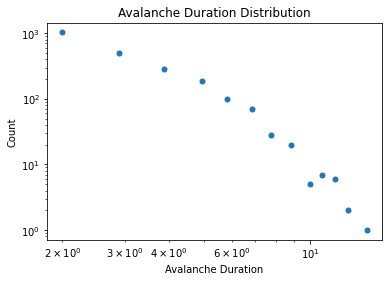

In [44]:
#Straight from HW page, with edits for var names. 
# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [testrun.diff(*states) for states in zip(testrun.past[:-1], testrun.past[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes = [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)
plt.title('Avalanche Duration Distribution')
plt.xlabel('Avalanche Duration')
plt.ylabel('Count')

In [ ]:
#1.3 for n = 10, N = 100
#2.7 for n = 20, N = 400
#8.9 for n = 50, N = 2500
#15.9 for n = 100, N = 10000

#It seems that at we increase the size n, our number of lattice sites are N = n**2, and the timing scales almost linearly.  